In [1]:
import cifar10
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
cifar10.data_path = "data/CIFAR-10/"

In [3]:
cifar10.maybe_download_and_extract()

- Download progress: 100.0%
Download finished. Extracting files.
Done.


In [4]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


#### Analysing the data

In [6]:
images_train.shape 
# contains rgb values of 50000 - 32x32 images

(50000, 32, 32, 3)

In [7]:
cls_train.shape 

(50000,)

In [8]:
labels_train.shape

(50000, 10)

#### Converting the each images to 1D

In [9]:
images_train.shape,images_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [10]:
# def grayscale(data, dtype='float32'):
#     # luma coding weighted average in video systems
#     r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
#     rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
#     # add channel dimension
#     rst = np.expand_dims(rst, axis=3)
#     return rst

# images_train_gray = grayscale(images_train)
# images_test_gray = grayscale(images_test)
# img = 64
# plt.figure(figsize=(4, 2))
# plt.subplot(1, 2, 1)
# plt.imshow(images_train[img], interpolation='none')
# plt.subplot(1, 2, 2)
# plt.imshow(images_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
# plt.show()

In [11]:
x_train = images_train.reshape(images_train.shape[0],-1)
x_test = images_test.reshape(images_test.shape[0], -1)

In [12]:
x_train.shape,x_test.shape

((50000, 3072), (10000, 3072))

In [13]:
y_train = cls_train
y_test = cls_test

In [14]:
# images_test_gray.shape

#### Plotting the first 64 images

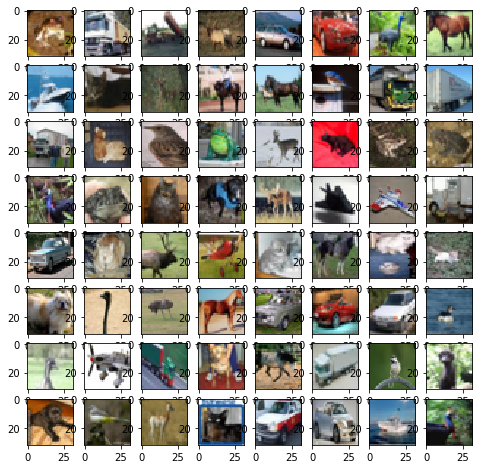

In [15]:
fig = plt.figure(figsize=(8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(images_train[i], cmap = plt.cm.bone)
plt.show()

## Applying PCA

In [16]:
pca = PCA()
pca.fit_transform(x_train)

array([[-6.40101763e+00,  2.72903876e+00,  1.50171052e+00, ...,
        -7.62287826e-04, -1.16359323e-03, -3.49768400e-04],
       [ 8.29783385e-01, -9.49943219e-01,  6.00375260e+00, ...,
         1.08434589e-04,  5.76715387e-04, -7.71005927e-04],
       [ 7.73019978e+00, -1.15221023e+01, -2.75362051e+00, ...,
        -1.04460109e-03, -2.14105740e-04, -3.93469526e-04],
       ...,
       [ 7.07346587e-01, -1.13425212e+01, -3.93914878e-01, ...,
        -3.80341568e-04,  1.86432348e-03,  1.44785229e-03],
       [ 1.13679090e+01, -3.37597765e+00,  5.56619766e+00, ...,
        -4.67096832e-04,  7.44972963e-04, -1.67065056e-03],
       [ 4.19279645e+00, -1.18418848e+00, -4.44596297e+00, ...,
         9.67968258e-04,  2.40363971e-04, -2.80506224e-05]])

#### Optimal k value

In [17]:
k = 0
total = sum(pca.explained_variance_)
current_variance = 0
while current_variance/total < 0.99:
    current_variance += pca.explained_variance_[k]
    k+=1
k 

658

#### Applying pca with optimal k

In [18]:
pca_cifar = PCA(n_components=k,whiten = True)
x_train_pca = pca_cifar.fit_transform(x_train)
x_train_pca.shape

(50000, 658)

#### plotting images for transformed data

In [19]:
x_approx = pca_cifar.inverse_transform(x_train_pca)
x_approx.shape

(50000, 3072)

In [20]:
x_approx = x_approx.reshape((50000,32,32,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

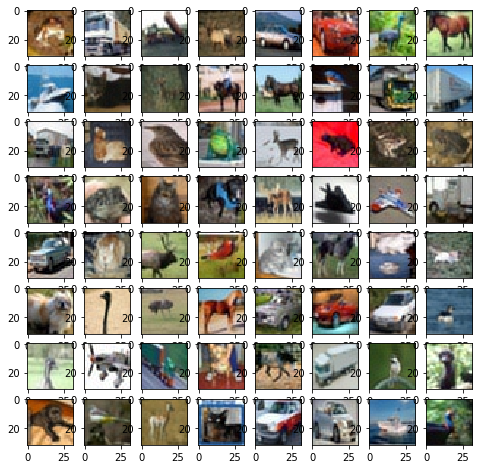

In [21]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx[i], cmap=plt.cm.bone)
plt.show()

In [22]:
# test data
x_test_pca = pca_cifar.transform(x_test)

In [23]:
x_train_pca.shape,x_test_pca.shape

((50000, 658), (10000, 658))

## Prediction using Random Forest

In [24]:
# training
rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
#predict

y_pred_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(y_test, y_pred_rf)
random_forest_score

0.2255

## Prediction using Logistic Regression

In [26]:
## Training 
lr = LogisticRegression()
lr.fit(x_train_pca, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
## Predicting
y_pred_lr = lr.predict(x_test_pca)
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
logistic_regression_score

0.4003

## Prediction using KNN

In [28]:
## Training 
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
## Predicting
y_pred_knn = knn.predict(x_test_pca)

knn_score = accuracy_score(y_test, y_pred_knn)
knn_score

0.1473

## Comparison between various Classifiers

In [30]:
print("RandomForestClassifier : ", random_forest_score)
print("K Nearest Neighbors : ", knn_score)
print("Logistic Regression : ", logistic_regression_score)

RandomForestClassifier :  0.2255
K Nearest Neighbors :  0.1473
Logistic Regression :  0.4003


In [31]:
y_pred=[]
for i in y_pred_lr:
    y_pred.append(class_names[i])

In [32]:
np.savetxt('prediction.csv', y_pred, delimiter=',',fmt = '%s')